# Problem Statement:

## We have been hired as a data analyst by a sports management company. They are interested in forming a new team for the upcoming IPL Season 2018 and want our expertise to suggest players that will maximize their chances of winning matches.  Task is to analyze the IPL dataset and recommend the top-performing players in various positions to include in the new team.

# Dataset Description

### This dataset is taken from the IPL_Ball_by_Ball_2008_2022 database. It contains comprehensive data on IPL matches, teams, players, and performance metrics

## We need to form a IPL team from the given information consisting of 11 players.


# Solution :-


## importing required libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset

In [59]:
df=pd.read_csv(r'C:\Users\DeLL\Documents\Learn And Build Data Science Summer Training\Major Project 1 IPL New Data\IPL_Ball_by_Ball_2008_2022.csv')

In [60]:

df

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [61]:
# shape of dataset

print("total rows: ",df.shape[0])
print("total columns: ",df.shape[1])
print ("total rows and columns",df.shape)

total rows:  225954
total columns:  17
total rows and columns (225954, 17)


In [62]:
# unique values in all the columns
df.nunique()

ID                   950
innings                6
overs                 20
ballnumber            10
batter               605
bowler               472
non-striker          595
extra_type             5
batsman_run            7
extras_run             7
total_run              8
non_boundary           2
isWicketDelivery       2
player_out           573
kind                  10
fielders_involved    535
BattingTeam           18
dtype: int64

In [63]:
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [65]:
df.describe()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
count,2.259540e+05,225954.000000,225954.000000,225954.000000,225954.000000,225954.000000,225954.00000,225954.000000,225954.000000
mean,8.320470e+05,1.483868,9.185679,3.619750,1.243523,0.066907,1.31043,0.000093,0.049351
std,3.379542e+05,0.503104,5.681797,1.810633,1.618166,0.341470,1.60605,0.009640,0.216600
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.012620e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,8.297370e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.00000,0.000000,0.000000
75%,1.178395e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.00000,0.000000,0.000000
max,1.312200e+06,6.000000,19.000000,10.000000,6.000000,7.000000,7.00000,1.000000,1.000000


##  Firstly we will clean our data

In [66]:
df.isnull().any()

ID                   False
innings              False
overs                False
ballnumber           False
batter               False
bowler               False
non-striker          False
extra_type            True
batsman_run          False
extras_run           False
total_run            False
non_boundary         False
isWicketDelivery     False
player_out            True
kind                  True
fielders_involved     True
BattingTeam          False
dtype: bool

In [67]:
df.duplicated().any()

False

### Checking null values

In [68]:
df.isna().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

### Checking the percentage of missing value 

In [69]:
df['extra_type'].isnull().mean()*100

94.66749869442452

In [70]:
df['player_out'].isnull().mean()*100

95.06492471919063

In [71]:
df['kind'].isnull().mean()*100 

95.06492471919063

In [72]:
df['fielders_involved'].isnull().mean()*100 

96.4647671649982

### But the given data in these column may be helpful in selecting players so we will not delete these columns

## Some of the columns is not relevant like ID and innings so we delete them

In [73]:
df.drop(['ID', 'innings'], axis = 1,inplace=True)

In [74]:
df.columns

Index(['overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam'],
      dtype='object')

In [75]:
df['player_out'].fillna('not out',inplace=True)
df['kind'].fillna('no type',inplace=True)
df['fielders_involved'].fillna('not involved',inplace=True)
df['extra_type'].fillna('no',inplace=True)
df

,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,no,0,0,0,0,0,not out,no type,not involved,Rajasthan Royals
1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,not out,no type,not involved,Rajasthan Royals
2,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,no,1,0,1,0,0,not out,no type,not involved,Rajasthan Royals
3,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,no,0,0,0,0,0,not out,no type,not involved,Rajasthan Royals
4,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,no,0,0,0,0,0,not out,no type,not involved,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,not out,no type,not involved,Royal Challengers Bangalore
225950,14,6,SB Joshi,I Sharma,P Kumar,no,1,0,1,0,0,not out,no type,not involved,Royal Challengers Bangalore
225951,14,7,P Kumar,I Sharma,SB Joshi,no,0,0,0,0,0,not out,no type,not involved,Royal Challengers Bangalore
225952,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,not out,no type,not involved,Royal Challengers Bangalore


## We have treat our null data.

##  Now we have cleaned our data, Our next step will be EDA(Exploratory Data Analysis)

### Which batsmans plays maximum no of balls

In [76]:
df.batter.value_counts().head(5)

V Kohli      5266
S Dhawan     5083
RG Sharma    4632
DA Warner    4313
SK Raina     4177
Name: batter, dtype: int64

### Number of batsman hits sixers

In [77]:

df[df['batsman_run']==6]['batter'].nunique()

400

In [78]:
df[df['batsman_run']==6]['batter'].describe()

count        10666
unique         400
top       CH Gayle
freq           359
Name: batter, dtype: object

## CH Gayle hits sixers 359(maximum no of times)among batters


### Now we are calculating top 5 batsman who hits six 

In [79]:
top_5_batsManwithSixers= df[df['batsman_run']==6]['batter'].value_counts()[df[df['batsman_run']==6]['batter'].value_counts() >= 223]
top_5_batsManwithSixers

CH Gayle          359
AB de Villiers    253
RG Sharma         241
MS Dhoni          229
KA Pollard        224
Name: batter, dtype: int64

### Number of batsman hits fours

In [80]:
df[df['batsman_run']==4]['batter'].nunique()

484

In [81]:
df[df['batsman_run']==4]['batter'].describe()

count        25500
unique         484
top       S Dhawan
freq           701
Name: batter, dtype: object

## S Dhawan hits four 701(maximum no of times)among batters

### Now we are calculating top 5 batsman who hits fours

In [82]:
top_5_batsManwithFours= df[df['batsman_run']==4]['batter'].value_counts()[df[df['batsman_run']==4]['batter'].value_counts() >= 505]
top_5_batsManwithFours

S Dhawan     701
V Kohli      581
DA Warner    577
RG Sharma    519
SK Raina     506
Name: batter, dtype: int64

### Top 5 players with maximum number of runs

In [83]:
totalrun=df.groupby('batter').agg({'batsman_run':'sum','batter':'count'})
totalrun.rename(columns={'batter':'No.of balls'},inplace=True)
totalrun

,batsman_run,No.of balls
batter,,
A Ashish Reddy,280,196
A Badoni,161,139
A Chandila,4,7
A Chopra,53,75
A Choudhary,25,20
...,...,...
Yash Dayal,0,1
Yashpal Singh,47,67
Younis Khan,3,7


In [84]:
df.player_out.value_counts().head(10)

not out       214803
RG Sharma        194
V Kohli          183
RV Uthappa       180
S Dhawan         179
SK Raina         171
KD Karthik       163
AT Rayudu        145
DA Warner        142
G Gambhir        136
Name: player_out, dtype: int64

In [85]:
totalrun=df.groupby('batter').agg({'batsman_run':'sum','batter':'count'})
totalrun.rename(columns={'batter':'No.of balls'},inplace=True)
totalrun

,batsman_run,No.of balls
batter,,
A Ashish Reddy,280,196
A Badoni,161,139
A Chandila,4,7
A Chopra,53,75
A Choudhary,25,20
...,...,...
Yash Dayal,0,1
Yashpal Singh,47,67
Younis Khan,3,7


# Calculate strike rate for finding the chances of hitting

In [86]:
totalrun['strike_rate'] = totalrun['batsman_run']/totalrun['No.of balls']*100
totalrun

,batsman_run,No.of balls,strike_rate
batter,,,
A Ashish Reddy,280,196,142.857143
A Badoni,161,139,115.827338
A Chandila,4,7,57.142857
A Chopra,53,75,70.666667
A Choudhary,25,20,125.000000
...,...,...,...
Yash Dayal,0,1,0.000000
Yashpal Singh,47,67,70.149254
Younis Khan,3,7,42.857143


## Top 5 players with best strike rate

In [88]:
totalrun.loc[totalrun['No.of balls']>=60, 'best_strikerate'] =totalrun['strike_rate']
top5= totalrun.sort_values(by='best_strikerate',ascending=False).head(5)
top5

,batsman_run,No.of balls,strike_rate,best_strikerate
batter,,,,
TH David,187,94,198.936170,198.936170
LJ Wright,106,63,168.253968,168.253968
AD Russell,2039,1212,168.234323,168.234323
KK Cooper,116,70,165.714286,165.714286
Kamran Akmal,128,78,164.102564,164.102564


## Calculating run rates

In [89]:
totalrun['overs']=totalrun['No.of balls']/6
totalrun['run rate']=(totalrun['batsman_run']/totalrun['overs'])*100
totalrun.sort_values(by='batsman_run',ascending=False).head(5)

,batsman_run,No.of balls,strike_rate,best_strikerate,overs,run rate
batter,,,,,,
V Kohli,6634,5266,125.977972,125.977972,877.666667,755.867831
S Dhawan,6244,5083,122.840842,122.840842,847.166667,737.045052
DA Warner,5883,4313,136.401577,136.401577,718.833333,818.409460
RG Sharma,5881,4632,126.964594,126.964594,772.000000,761.787565
SK Raina,5536,4177,132.535312,132.535312,696.166667,795.211875


## Top 5 players with best run rate

In [91]:
totalrun.loc[totalrun['No.of balls']>=60, 'best_runrate'] =totalrun['run rate']
top5= totalrun.sort_values(by='best_runrate',ascending=False).head(5)
top5

,batsman_run,No.of balls,strike_rate,best_strikerate,overs,run rate,best_runrate
batter,,,,,,,
TH David,187,94,198.936170,198.936170,15.666667,1193.617021,1193.617021
LJ Wright,106,63,168.253968,168.253968,10.500000,1009.523810,1009.523810
AD Russell,2039,1212,168.234323,168.234323,202.000000,1009.405941,1009.405941
KK Cooper,116,70,165.714286,165.714286,11.666667,994.285714,994.285714
Kamran Akmal,128,78,164.102564,164.102564,13.000000,984.615385,984.615385


In [92]:
tot= df.groupby('batter').agg({'batsman_run':'sum','isWicketDelivery':'sum'}).sort_values(by='batsman_run',ascending=False).head(5)
tot.rename(columns={'isWicketDelivery': 'No of times out'},inplace=True)
tot

,batsman_run,No of times out
batter,,
V Kohli,6634,193
S Dhawan,6244,179
DA Warner,5883,143
RG Sharma,5881,203
SK Raina,5536,168


In [93]:
df['batter']

0         YBK Jaiswal
1         YBK Jaiswal
2          JC Buttler
3         YBK Jaiswal
4         YBK Jaiswal
             ...     
225949        P Kumar
225950       SB Joshi
225951        P Kumar
225952       SB Joshi
225953       SB Joshi
Name: batter, Length: 225954, dtype: object

In [94]:
df.player_out.value_counts().head(10)

not out       214803
RG Sharma        194
V Kohli          183
RV Uthappa       180
S Dhawan         179
SK Raina         171
KD Karthik       163
AT Rayudu        145
DA Warner        142
G Gambhir        136
Name: player_out, dtype: int64

In [95]:
PlayerOut = df.groupby('batter').agg({'total_run':'sum'}).sort_values(by='total_run',ascending=False).head(5)
PlayerOut

,total_run
batter,
V Kohli,6876
S Dhawan,6561
DA Warner,6191
RG Sharma,6083
SK Raina,5780


In [96]:
df.player_out.value_counts().tail(10)

R Shukla                1
OC McCoy                1
V Pratap Singh          1
UA Birla                1
X Thalaivan Sargunam    1
AG Murtaza              1
IC Pandey               1
SMSM Senanayake         1
Sunny Gupta             1
AA Noffke               1
Name: player_out, dtype: int64

### Visualize the above data

### Top 5 batsman in terms of  total runs

In [97]:
top5_batsman = df.groupby('batter').agg({'total_run':'sum'}).sort_values(by='total_run',ascending=False).head(5)
top5_batsman

,total_run
batter,
V Kohli,6876
S Dhawan,6561
DA Warner,6191
RG Sharma,6083
SK Raina,5780


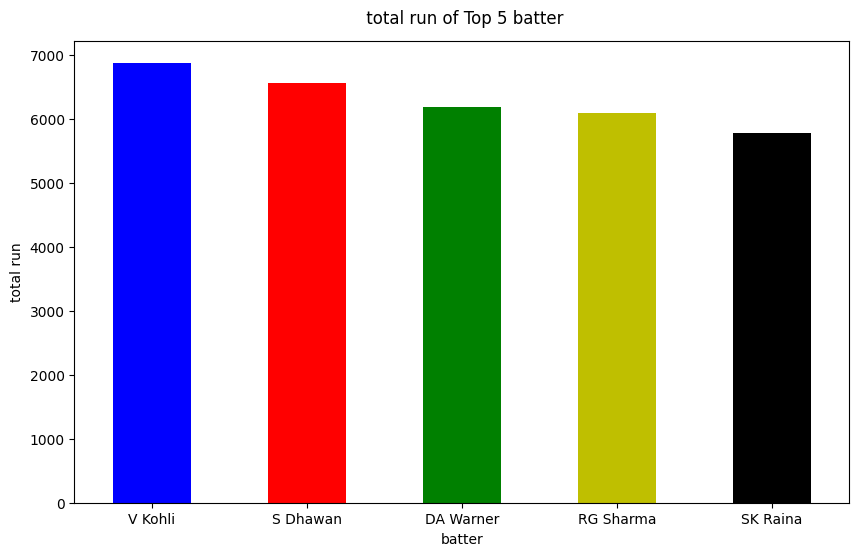

In [98]:
f, ax = plt.subplots(1,figsize=(10,6))

top5_batsman['total_run'].plot.bar(color=['b', 'r', 'g', 'y', 'k'],ax=ax)
ax.set_ylabel('total run')
ax.set_title(' total run of Top 5 batter', y=1.02)
ax.set_xticklabels(top5_batsman.index, rotation = 0);

In [99]:
df[df['non_boundary']!=0]

,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
4632,11,2,DP Conway,MR Marsh,S Dube,no,4,0,4,1,0,not out,no type,not involved,Chennai Super Kings
10604,2,6,JC Buttler,UT Yadav,D Padikkal,no,4,0,4,1,0,not out,no type,not involved,Rajasthan Royals
13067,0,3,D Padikkal,PVD Chameera,JC Buttler,no,4,0,4,1,0,not out,no type,not involved,Rajasthan Royals
30579,11,3,F du Plessis,JA Richardson,MM Ali,no,4,0,4,1,0,not out,no type,not involved,Chennai Super Kings
32612,6,4,S Dhawan,Rashid Khan,MP Stoinis,no,6,0,6,1,0,not out,no type,not involved,Delhi Capitals
35356,15,1,RR Pant,SM Curran,SS Iyer,no,4,0,4,1,0,not out,no type,not involved,Delhi Capitals
48304,13,2,N Pooran,DJ Bravo,Mandeep Singh,no,4,0,4,1,0,not out,no type,not involved,Kings XI Punjab
70980,9,2,KS Williamson,SR Watson,Shakib Al Hasan,no,4,0,4,1,0,not out,no type,not involved,Sunrisers Hyderabad
86889,18,6,MM Sharma,TA Boult,VR Aaron,no,4,0,4,1,0,not out,no type,not involved,Kings XI Punjab
88601,12,4,GJ Maxwell,RD Chahar,DA Miller,no,4,0,4,1,0,not out,no type,not involved,Kings XI Punjab


### Top 5 batsman in terms of non_boundary

In [100]:
top5_batsman = df.groupby('batter').agg({'non_boundary':'sum'}).sort_values(by='non_boundary',ascending=False).head(5)
top5_batsman

,non_boundary
batter,
V Kohli,2
F du Plessis,1
S Dhawan,1
GJ Maxwell,1
RG Sharma,1


## Visualize the above data

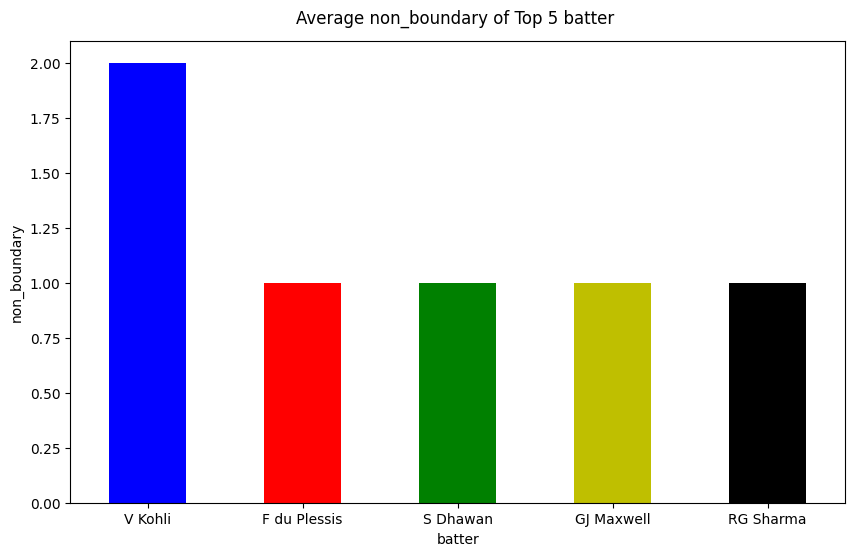

In [101]:
f, ax = plt.subplots(1,figsize=(10,6))

top5_batsman['non_boundary'].plot.bar(color=['b', 'r', 'g', 'y', 'k'],ax=ax)
ax.set_ylabel('non_boundary')
ax.set_title('Average non_boundary of Top 5 batter ', y=1.02)
ax.set_xticklabels(top5_batsman.index, rotation = 0);

##  Now analyse the data for bowlers

In [102]:
df['bowler'].describe()

count       225954
unique         472
top       R Ashwin
freq          4024
Name: bowler, dtype: object

### Total 472 bowlers in which R Ashwin did bowling maximum number of times

### Top 10 bowlers according to the number of times they did bowling

In [103]:
df.bowler.value_counts().head(10)

R Ashwin           4024
SP Narine          3516
Harbhajan Singh    3496
B Kumar            3384
A Mishra           3317
PP Chawla          3309
DJ Bravo           3296
RA Jadeja          3262
SL Malinga         2974
UT Yadav           2945
Name: bowler, dtype: int64

### Players according to the number of times they bowled

In [104]:
wickets = df.groupby('bowler').agg({'ballnumber':'count'}).sort_values(by='ballnumber',ascending=False).head(5)
wickets

,ballnumber
bowler,
R Ashwin,4024
SP Narine,3516
Harbhajan Singh,3496
B Kumar,3384
A Mishra,3317


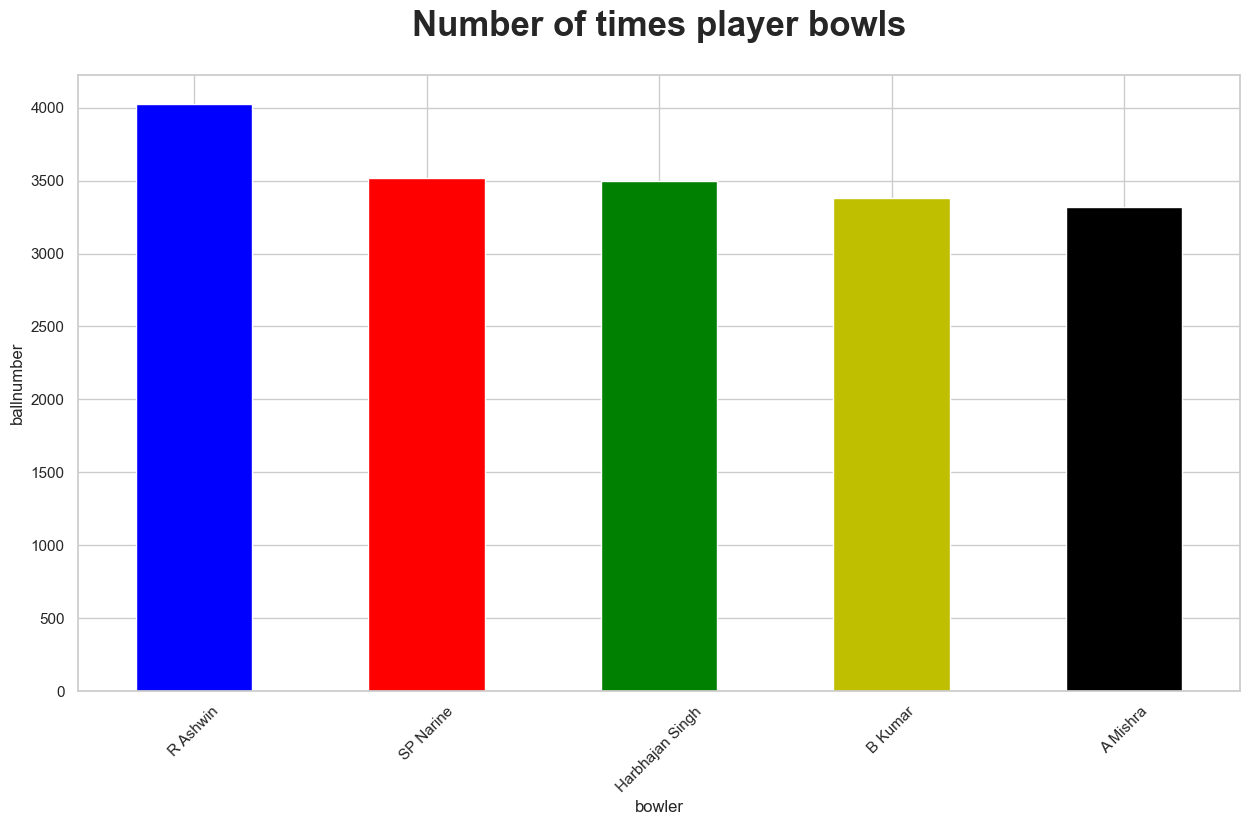

In [105]:
# top 5 Director in terms of rating 
sns.set_theme(context='notebook',palette='viridis' ,style='whitegrid')
f, ax = plt.subplots(1,figsize=(15,8))
wickets['ballnumber'].plot.bar(color=['b', 'r', 'g', 'y', 'k'],ax=ax)
ax.set_ylabel('ballnumber')
ax.set_title('Number of times player bowls', y=1.05,fontsize=25, weight='bold')
ax.set_xticklabels(wickets.index, rotation = 45);


### Players according to the number of wickets they take

In [106]:
wicket_delivery = df.groupby('bowler').agg({'isWicketDelivery':'sum'}).sort_values(by='isWicketDelivery',ascending=False).head(5)
wicket_delivery

,isWicketDelivery
bowler,
DJ Bravo,207
SL Malinga,188
A Mishra,175
R Ashwin,174
YS Chahal,172


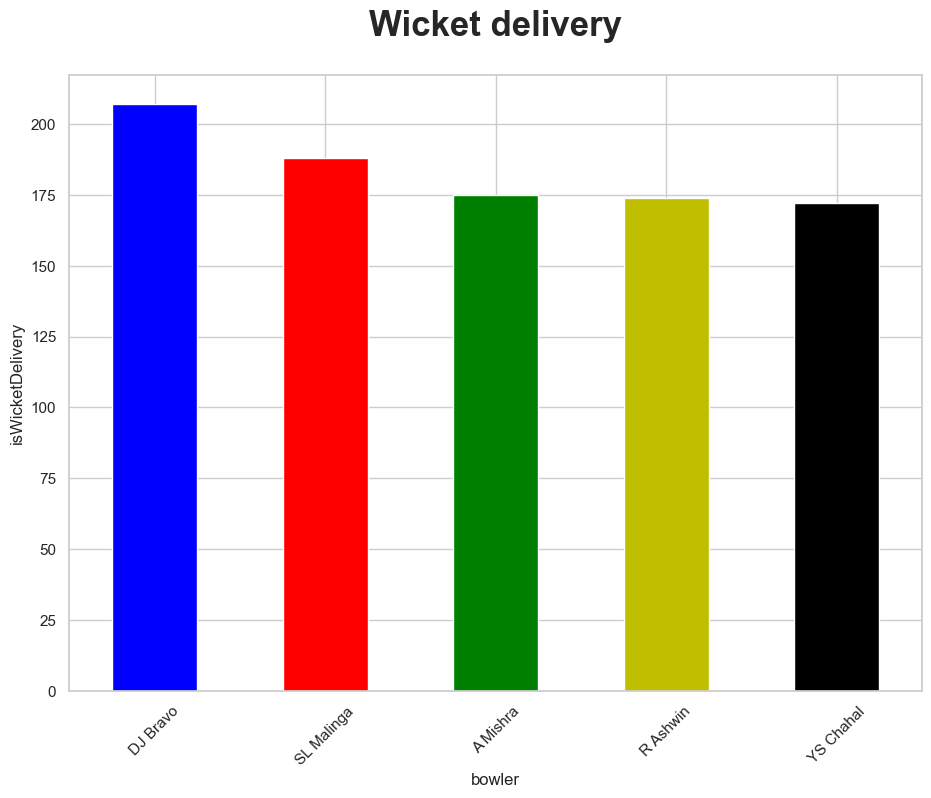

In [107]:
# top 5 Director in terms of rating 
sns.set_theme(context='notebook',palette='viridis' ,style='whitegrid')
f, ax = plt.subplots(1,figsize=(11,8))
wicket_delivery['isWicketDelivery'].plot.bar(color=['b', 'r', 'g', 'y', 'k'],ax=ax)
ax.set_ylabel('isWicketDelivery')
ax.set_title('Wicket delivery', y=1.05,fontsize=25, weight='bold')
ax.set_xticklabels(wicket_delivery.index, rotation = 45);

In [110]:
df[df['bowler']==df['batter']]

,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam


### There is no player who did bowling and batting both.

# Now analysing the bowling rate 

In [111]:
top5_ballers= df.groupby('bowler').agg({'total_run':'sum','bowler':'count','isWicketDelivery':'sum'})
top5_ballers.rename(columns={'bowler':'no_of_balls'},inplace=True)
top5_ballers

,total_run,no_of_balls,isWicketDelivery
bowler,,,
A Ashish Reddy,400,270,19
A Badoni,12,12,2
A Chandila,245,234,11
A Choudhary,144,108,5
A Dananjaya,47,25,0
...,...,...,...
YK Pathan,1443,1184,46
YS Chahal,3699,2940,172
Yash Dayal,296,205,13


In [112]:
top5_ballers['bowlingRate'] = top5_ballers['total_run']/top5_ballers['no_of_balls']*6
top5_ballers

,total_run,no_of_balls,isWicketDelivery,bowlingRate
bowler,,,,
A Ashish Reddy,400,270,19,8.888889
A Badoni,12,12,2,6.000000
A Chandila,245,234,11,6.282051
A Choudhary,144,108,5,8.000000
A Dananjaya,47,25,0,11.280000
...,...,...,...,...
YK Pathan,1443,1184,46,7.312500
YS Chahal,3699,2940,172,7.548980
Yash Dayal,296,205,13,8.663415


## Finding top players according to bowling rate

In [135]:
top5_ballers.loc['best_wicket_delivery']=top5_ballers['bowlingRate']
t= top5_ballers.sort_values(by='best_wicket_delivery').head(10)
t

,total_run,no_of_balls,isWicketDelivery,bowlingRate,best_wicket_delivery
bowler,,,,,
Mohsin Khan,202.0,206.0,14.0,5.883495,5.883495
Sohail Tanvir,275.0,265.0,24.0,6.226415,6.226415
A Chandila,245.0,234.0,11.0,6.282051,6.282051
FH Edwards,160.0,150.0,6.0,6.400000,6.400000
Rashid Khan,2411.0,2232.0,119.0,6.481183,6.481183
JW Hastings,66.0,61.0,3.0,6.491803,6.491803
SMSM Senanayake,211.0,195.0,9.0,6.492308,6.492308
MJ Clarke,72.0,66.0,3.0,6.545455,6.545455
SM Pollock,307.0,280.0,13.0,6.578571,6.578571


In [126]:
df['kind'].value_counts()


no type                  214803
caught                     6837
bowled                     1944
run out                    1007
lbw                         685
stumped                     325
caught and bowled           323
hit wicket                   14
retired hurt                 13
obstructing the field         2
retired out                   1
Name: kind, dtype: int64

## we can find wicket keeper by kind = stumped 

In [115]:
df.loc[df['kind'] == 'stumped', 'wicket_out'] =df['fielders_involved']
wicket_keeper= df.groupby('fielders_involved').agg({'wicket_out':'count'})
wicket_keeper.sort_values(by='wicket_out',ascending=False).head(5)

,wicket_out
fielders_involved,
MS Dhoni,39
KD Karthik,34
RV Uthappa,32
WP Saha,22
RR Pant,18


### best wicket keeper is MS Dhoni

In [116]:
df.loc[df['kind'] == 'caught', 'catchout'] =df['fielders_involved']
catchout= df.groupby('fielders_involved').agg({'catchout':'count'})
catchout.sort_values(by='catchout',ascending=False).head(5)

,catchout
fielders_involved,
MS Dhoni,135
KD Karthik,133
AB de Villiers,120
SK Raina,106
KA Pollard,97


## Conclusion:-

# Batters:
##### 1. CH Gayle =Because he hits maximum sixes.
##### 2. S Dhawan=Because he hits maximum fours and also comes in the category of top 4 players who scored maximum total runs.
##### 3.TH David=Because his strike rate and run rate value is highest
##### 4.LJ Wright=Because his strike rate and run rate is second highest.

### Bowlers:-
##### 5. Moshin Khan :- Because his bowling rate is highest
##### 6.Sohail Tanvir:- Because he  has second highest bowling rate.
##### 7. DJ Bravo :- He tooks the maximum no of wickets among all bowlers.
##### 8. FH Edwards:- batsman makes lesser run  while his bowling

### Wicket Keeper:-
#### 9. MS Dhoni: Because he does stump out maximum times

# Fielders:
#### 10.KD Karthik: Because he catches second maximum times
#### 11.AB de Villiers: Because he catches third maximum times